## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [106]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu


# Section 1: Exploratory Data Analysis


----

**countplot of loan_status.**

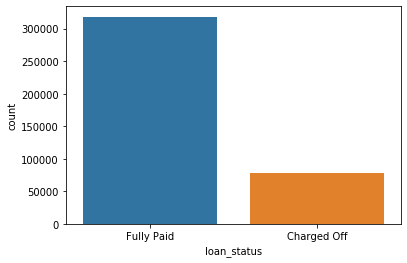

In [108]:
sns.countplot(x='loan_status',data=df)

**histogram of the loan_amnt column.**

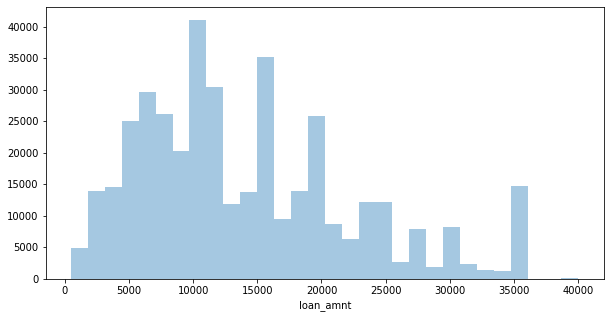

In [109]:
plt.figure(figsize=(10,5))
sns.distplot(df[('loan_amnt')], bins=30, kde=False)

**correlation between all continuous numeric variables .**

In [110]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualize this using a heatmap**


In [111]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


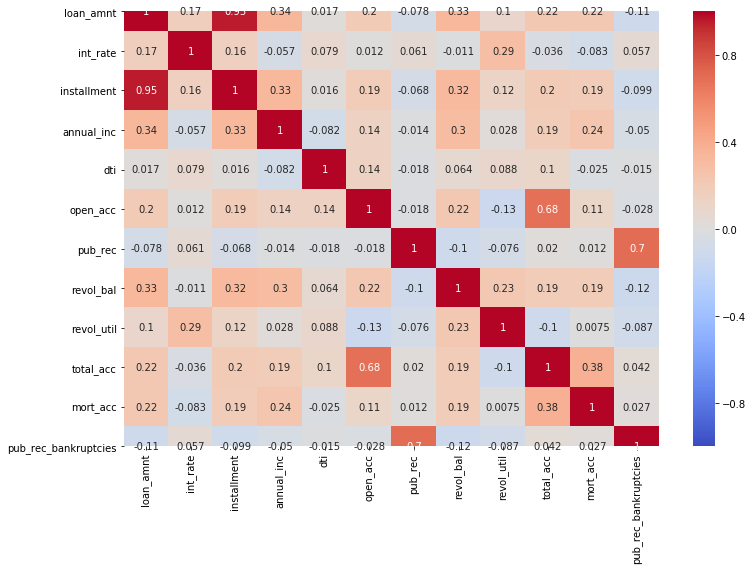

In [112]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', vmin=-1,vmax=1)

**Explore correlation with the "installment" feature. **

In [114]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [115]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


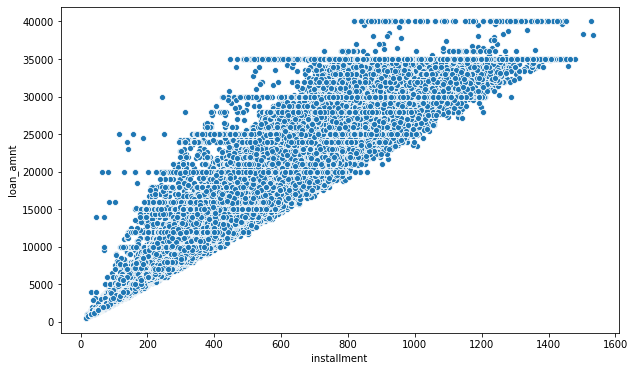

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=('installment'), y=('loan_amnt'), data=df)

**boxplot showing the relationship between the loan_status and the Loan Amount.**

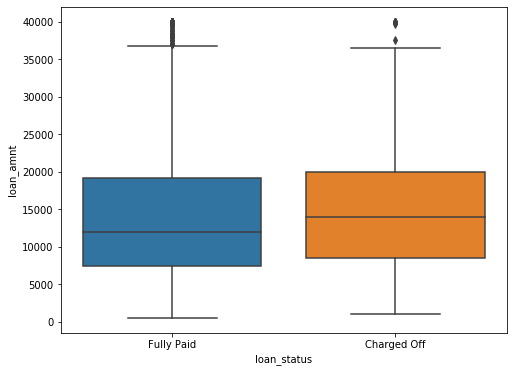

In [117]:
plt.figure(figsize=(8,6))
sns.boxplot(x=('loan_status'),y=('loan_amnt'),data=df)

**summary statistics for the loan amount, grouped by the loan_status.**

In [118]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**explore the Grade and SubGrade columns that LendingClub attributes to the loans. **

In [241]:
#df['grade'].unique()

In [120]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**countplot per grade. Set the hue to the loan_status label.**

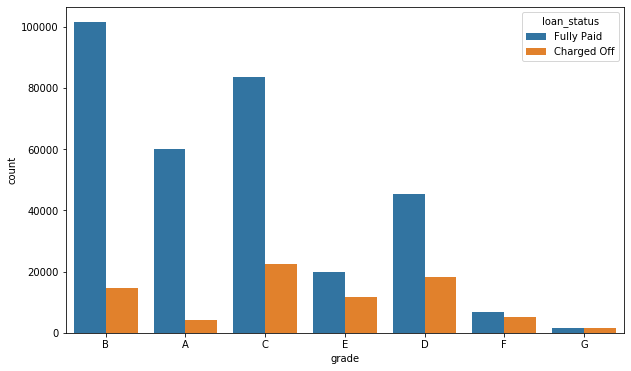

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(x=('grade'),data=df,hue=('loan_status'))

**count plot per subgrade.**

In [122]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

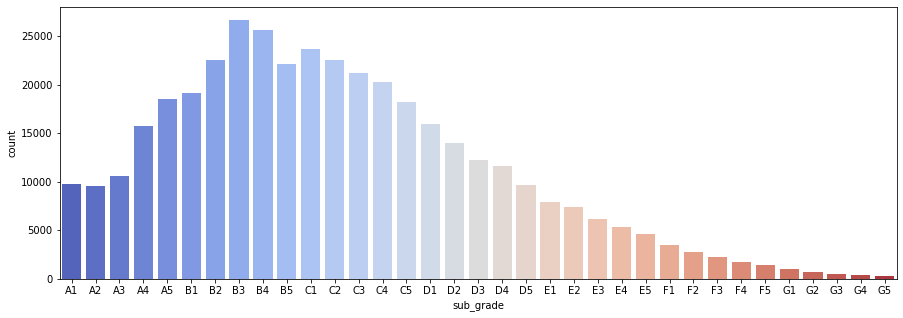

In [123]:
plt.figure(figsize=(15,5))
sns.countplot(x=('sub_grade'),data=df,
              order=df['sub_grade'].sort_values().unique(),
             palette='coolwarm')

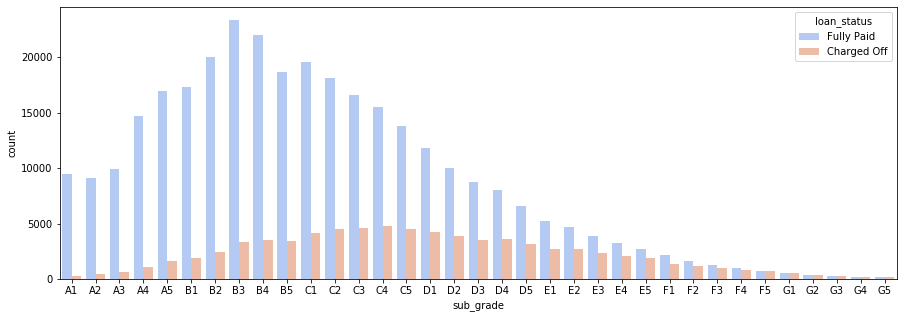

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(x=('sub_grade'),data=df,
              order=df['sub_grade'].sort_values().unique(),
             hue='loan_status', palette='coolwarm')

**It looks like F and G subgrades don't get paid back that often. recreate the countplot just for those subgrades.**

In [125]:
bad_loans = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

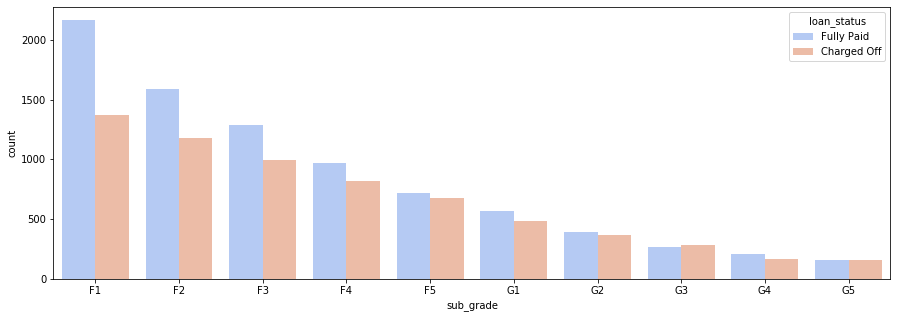

In [126]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=bad_loans, hue='loan_status',
             order=bad_loans['sub_grade'].sort_values().unique(),
             palette='coolwarm')

**reate a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [127]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

**bar plot showing the correlation of the numeric features to the new loan_repaid column**

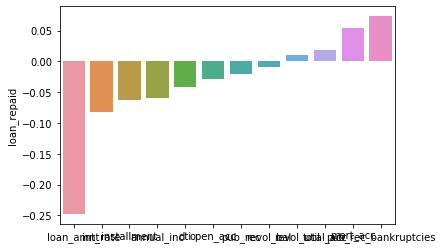

In [129]:
sns.barplot(x=df.corr()['loan_repaid'].index[:-1], y=df.corr()['loan_repaid'].iloc[:-1].sort_values(),
           )

---
---
# Section 2: Data PreProcessing



# Missing Data


**length of the dataframe?**

In [242]:
len(df)

395219

**Series that displays the total count of missing values per column.**

In [131]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Series to be in term of percentage of the total DataFrame**

In [132]:
df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [133]:
feat_info('emp_title')

feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [134]:
len(df['emp_title'].unique())

173106

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature**

In [135]:
df = df.drop('emp_title', axis=1)

**count plot of the emp_length feature column**

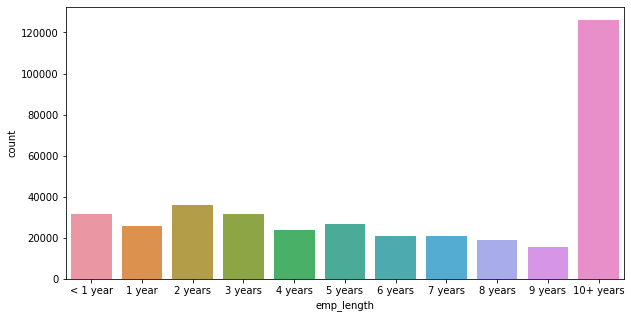

In [136]:
plt.figure(figsize=(10,5))
bar_order = ['< 1 year', '1 year','2 years',
            '3 years','4 years','5 years',
            '6 years','7 years','8 years',
            '9 years','10+ years']
sns.countplot(x='emp_length',data=df, order=bar_order )

**countplot with a hue separating Fully Paid vs Charged Off**

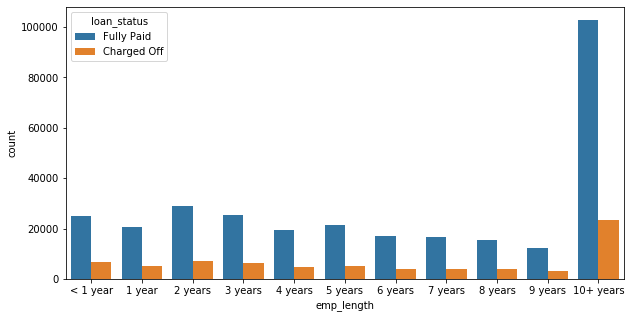

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=df, order=bar_order, hue='loan_status' )

**percentage of charge offs per category**

In [138]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [139]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [140]:
emp_len = emp_co/emp_fp

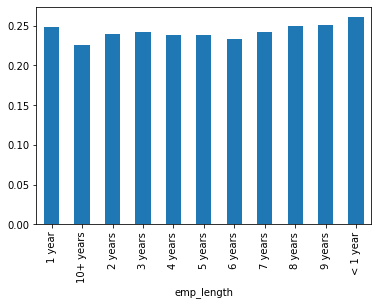

In [141]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [143]:
df = df.drop('emp_length',axis=1)

In [144]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column**

In [145]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [146]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column.**

In [147]:
df = df.drop('title', axis=1)


**mort_acc feature represents**

In [148]:
feat_info('mort_acc')

Number of mortgage accounts.


**value_counts of the mort_acc column.**

In [149]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**Let's review the other columns to see which most highly correlates to mort_acc**

In [150]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc. Let's try this fillna() approach. group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [151]:
mean_mc_per_tc = df.groupby('total_acc').mean()['mort_acc']

**fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

In [152]:
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return mean_mc_per_tc[total_acc]
    else:
        return mort_acc

In [153]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'], x['total_acc']), axis=1)

In [154]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. remove the rows that are missing those values in those columns with dropna().**

In [155]:
df.dropna(axis=0, inplace=True)

## Categorical Variables and Dummy Variables

In [156]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Convert the term feature into either a 36 or 60 integer numeric data type**

In [157]:
df['term'] = df.apply(lambda x : 36 if '36' in x['term'] else 60, axis=1)

In [158]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**drop the grade feature.**

In [159]:
df = df.drop('grade', axis=1)

**subgrade into dummy variables**

In [160]:
df = pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1)

In [161]:
df = df.drop('sub_grade', axis=1)

In [163]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables**

In [164]:
df = pd.concat([df, pd.get_dummies(df['verification_status'], drop_first=True)], axis=1)
df = df.drop('verification_status', axis=1)

In [165]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [166]:
df = pd.concat([df, pd.get_dummies(df['application_type'], drop_first=True)], axis=1)
df = df.drop('application_type', axis=1)

In [167]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [168]:
df = pd.concat([df, pd.get_dummies(df['purpose'], drop_first=True)], axis=1)
df = df.drop('purpose', axis=1)

In [169]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [170]:
df = pd.concat([df, pd.get_dummies(df['initial_list_status'], drop_first=True)], axis=1)
df = df.drop('initial_list_status', axis=1)

### home_ownership



In [171]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert these to dummy variables, and replace NONE and ANY with OTHER**

In [172]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

In [173]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)
df = df.drop('home_ownership', axis=1)

### address
**feature engineer a zip code column from the address in the data set**

In [174]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

**zip_code column into dummy variables**

In [175]:
df = pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis=1)
df = df.drop(['address','zip_code'], axis=1)


### issue_d 

**This would be data leakage, drop this feature.**

In [176]:
df = df.drop('issue_d', axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature**

In [177]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [178]:
df = pd.concat([df, pd.get_dummies(df['earliest_cr_year'], drop_first=True)], axis=1)
df = df.drop('earliest_cr_line', axis=1)

## Train Test Split

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
df = df.drop('loan_status', axis=1)

In [181]:
#df = df.sample(frac=0.25,random_state=101)

In [182]:
X = df.drop('loan_repaid', axis=1).values

In [183]:
y = df['loan_repaid'].values

In [184]:
#df = df.sample(frac=0.25,random_state=101)
print(len(df))

395219


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data


In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()

In [188]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [189]:
X_train = scaler.transform(X_train)

In [190]:
X_test = scaler.transform(X_test)

# Creating the Model

In [191]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [192]:
X.shape

(395219, 142)

In [210]:

model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [211]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=25, validation_data=(X_test, y_test) )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.3001 - val_loss: 0.2651
Epoch 2/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2655 - val_loss: 0.2634
Epoch 3/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2626 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2613 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2605 - val_loss: 0.2619
Epoch 6/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2598 - val_loss: 0.2631
Epoch 7/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2588 - val_loss: 0.2622
Epoch 8/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2586 - val_loss: 0.2618
Epoch 9/25
316175/316175 [==============================] - 4s 14us/sample - 

In [214]:
loss_df = pd.DataFrame(model.history.history)

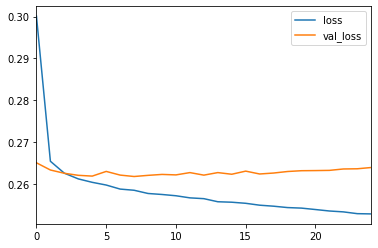

In [215]:
loss_df.plot()

**TASK: OPTIONAL: Save your model.**

In [134]:
# CODE HERE

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [137]:
# CODE HERE

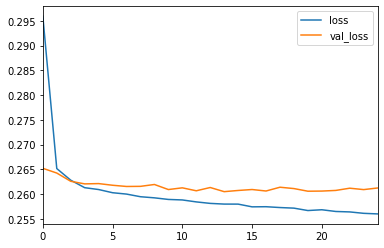

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [221]:
predictions = model.predict_classes(X_test)

In [222]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [225]:
from sklearn.metrics import classification_report, confusion_matrix

In [227]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [228]:
print(confusion_matrix(y_test, predictions))

[[ 7006  8652]
 [  213 63173]]


**TASK: Given the customer below, would you offer this person a loan?**

In [229]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
2009               0.00
2010               0.00
2011               0.00
2012               0.00
2013               0.00
Name: 305323, Length: 142, dtype: float64

In [238]:
model.predict_classes(new_customer.values.reshape(1,142))

array([[1]], dtype=int32)

array([[1]])

**did this person actually end up paying back their loan?**

In [239]:
df.iloc[random_ind]['loan_repaid']

1.0